## Arbeitsverzeichnis prüfen


In [145]:
import os
print(os.getcwd())  # zeigt, in welchem Ordner du dich gerade befindest


c:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit


## Daten laden


In [146]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Alle Spalten anzeigen
features_df = pd.read_pickle("FinaleTabelle_With_Shifts.pkl")

In [147]:
features_df

,ts,interval_end,n_arrivals,n_departures,n_total,grid_time,station,air_temperature_2_m_above_ground_current_value__degc_,air_temperature_at_5_cm_above_grass_current_value__degc_,air_temperature_at_surface_current_value__degc_,chill_temperature_current_value__degc_,relative_air_humidity_2_m_above_ground_current_value__percent_,dew_point_2_m_above_ground_current_value__degc_,vapour_pressure_2_m_above_ground_current_value__hpa_,atmospheric_pressure_at_barometric_altitude__qfe__current_value__hpa_,pressure_reduced_to_sea_level_according_to_standard_atmosphere__qnh__current_value__hpa_,pressure_reduced_to_sea_level__qff__current_value__hpa_,geopotential_height_of_the_850_hpa_level_current_value__gpm_,geopotential_height_of_the_700_hpa_level_current_value__gpm_,gust_peak__one_second__maximum_in_m_per_s__m_per_s_,wind_speed_vectoriel_ten_minutes_mean_in_m_per_s__m_per_s_,wind_speed_scalar_ten_minutes_mean_in_m_per_s__m_per_s_,wind_direction_ten_minutes_mean__deg_,foehn_index__code_,wind_speed_ten_minutes_mean_in_km_per_h__km_per_h_,gust_peak__three_seconds__maximum_in_m_per_s__m_per_s_,gust_peak__one_second__maximum_in_km_per_h__km_per_h_,gust_peak__three_seconds__maximum_in_km_per_h__km_per_h_,precipitation_ten_minutes_total__mm_,snow_depth__automatic_measurement__current_value__cm_,global_radiation_ten_minutes_mean__w_per_m_2_,diffuse_radiation_ten_minutes_mean__w_per_m_2_,longwave_incoming_radiation_ten_minutes_mean__w_per_m_2_,longwave_outgoing_radiation_ten_minute_mean__w_per_m_2_,shortwave_reflected_radiation_ten_minute_mean__w_per_m_2_,sunshine_duration_ten_minutes_total__min_,code,type,correction,mod,station_id,cycle,wind_dir,wind_vrb,wind_speed,wind_gust,wind_dir_from,wind_dir_to,vis,vis_dir,max_vis,max_vis_dir,temp,dewpt,press,runway,weather,recent,sky,windshear,wind_speed_peak,wind_dir_peak,peak_wind_time,wind_shift_time,max_temp_6hr,min_temp_6hr,max_temp_24hr,min_temp_24hr,press_sea_level,precip_1hr,precip_3hr,precip_6hr,precip_24hr,snowdepth,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,airport,AG,AI,AR,BE,BL,BS,FR,GE,GL,GR,JU,LU,NE,NW,OW,SG,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH,COUNT_ANY,ANY,SHARE_ANY,Time_of_Prediction,Hour_sin,Hour_cos,Minute_sin,Minute_cos,Day_of_week_sin,Day_of_week_cos,Month_sin,Month_cos,Year_sin,Year_cos,vis_m,vis_cat,wind_dir_deg,wind_dir_sin,wind_dir_cos,interval_end.1,dominant_runway_concept,dominant_runway_count,Ferien_Gesamtfaktor,n_arrivals2,n_departures2,n_arrivals3,n_departures3
0,2023-01-01 05:50:00+00:00,2023-01-01 06:20:00,5,0,5,2023-01-01 05:50:00,KLO,13.0,9.9,9.1,13.0,66.3,6.9,9.9,973.0,1023.8,1023.5,NaN,NaN,7.3,4.0,4.1,224.0,NaN,14.8,6.9,26.3,24.8,0.0,0.0,2,1.0,302,NaN,NaN,0,LSZH 010550Z 22007KT CAVOK 13/07 Q1023 NOSIG,METAR,NaN,AUTO,LSZH,6.0,220.0,False,7.0,NaN,NaN,NaN,10000 meters,NaN,NaN,NaN,13.0,7.0,1023.0,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LSZH,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,26,True,1.0,2023-01-01 05:50:00+00:00,0.982963,0.629410,0.066987,0.75,0.109084,0.811745,0.75,0.933013,0.996057,0.562667,10000.0,H,220.0,0.178606,0.116978,2023-01-01 06:20:00,EVENING_C1,5,17.520557,1,3,4,9
1,2023-01-01 06:20:00+00:00,2023-01-01 06:50:00,1,3,4,2023-01-01 06:20:00,KLO,12.5,9.7,9.0,12.5,68.4,6.8,9.9,973.2,1024.0,1023.8,NaN,NaN,6.1,4.1,4.1,233.0,NaN,14.8,5.7,22.0,20.5,0.0,0.0,2,1.0,300,NaN,NaN,0,LSZH 010620Z 24007KT CAVOK 13/07 Q1024 NOSIG,METAR,NaN,AUTO,LSZH,6.0,240.0,False,7.0,NaN,NaN,NaN,10000 meters,NaN,NaN,NaN,13.0,7.0,1024.0,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LSZH,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,26,True,1.0,2023-01-01 06:20:00+00:00,1.000000,0.500000,0.933013,0.25,0.109084,0.811745,0.75,0.933013,0.996057,0.562667,10000.0,H,240.0,0.066987,0.250000,2023-01-01 06:50:00,EVENING_C1,4,17.520557,4,9,1,18
2,20

In [148]:
print(list(features_df.columns))

['ts', 'interval_end', 'n_arrivals', 'n_departures', 'n_total', 'grid_time', 'station', 'air_temperature_2_m_above_ground_current_value__degc_', 'air_temperature_at_5_cm_above_grass_current_value__degc_', 'air_temperature_at_surface_current_value__degc_', 'chill_temperature_current_value__degc_', 'relative_air_humidity_2_m_above_ground_current_value__percent_', 'dew_point_2_m_above_ground_current_value__degc_', 'vapour_pressure_2_m_above_ground_current_value__hpa_', 'atmospheric_pressure_at_barometric_altitude__qfe__current_value__hpa_', 'pressure_reduced_to_sea_level_according_to_standard_atmosphere__qnh__current_value__hpa_', 'pressure_reduced_to_sea_level__qff__current_value__hpa_', 'geopotential_height_of_the_850_hpa_level_current_value__gpm_', 'geopotential_height_of_the_700_hpa_level_current_value__gpm_', 'gust_peak__one_second__maximum_in_m_per_s__m_per_s_', 'wind_speed_vectoriel_ten_minutes_mean_in_m_per_s__m_per_s_', 'wind_speed_scalar_ten_minutes_mean_in_m_per_s__m_per_s_', '

## Feature- und Target-Definition


In [149]:
X = features_df[[
    'dominant_runway_concept',
    'Ferien_Gesamtfaktor',
    'wind_dir_sin',
    #'wind_dir_cos',
    #'vis_m',
    #'vis_cat',
    'Hour_sin',
    'Hour_cos',
    'Minute_sin',
    #'Minute_cos',
    'Day_of_week_sin',
    #'Day_of_week_cos',
    'Month_sin',
    'Month_cos',
    #'COUNT_ANY',
    'temp',
    #'dewpt',
    'press',
    'precipitation_ten_minutes_total__mm_',
    #'gust_peak__three_seconds__maximum_in_m_per_s__m_per_s_',
    #'gust_peak__one_second__maximum_in_m_per_s__m_per_s_'
]]


In [150]:
y = features_df[['n_arrivals']]

## Datensplit (Train, Validation, Test)


In [151]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [152]:
# 1. Erster Split → 60% Train, 40% "Temp" (Test+Val)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# 2. Zweiter Split → 50% von 40% = 20% Test, 20% Validation
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [153]:
X_train

,dominant_runway_concept,Ferien_Gesamtfaktor,wind_dir_sin,Hour_sin,Hour_cos,Minute_sin,Day_of_week_sin,Month_sin,Month_cos,temp,press,precipitation_ten_minutes_total__mm_
13982,SOUTH_C1,0.000000,0.116978,0.250000,0.933013,0.933013,0.012536,0.750000,0.933013,-3.0,1020.0,0.0
8973,STANDARD,0.000000,0.007596,0.146447,0.146447,0.933013,0.716942,0.066987,0.250000,18.0,1017.0,0.0
13838,SOUTH,0.000000,0.250000,0.982963,0.629410,0.066987,0.987464,0.750000,0.933013,-5.0,1024.0,0.0
1639,STANDARD,4.001727,NaN,0.629410,0.017037,0.933013,0.890916,0.933013,0.750000,1.0,1035.0,0.0
11374,STANDARD,0.803779,0.007596,0.370590,0.017037,0.933013,0.012536,0.250000,0.933013,7.0,989.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
16850,STANDARD,10.417325,0.066987,0.370590,0.017037,0.933013,0.109084,1.000000,0.500000,18.0,996.0,0.0
6265,STANDARD,0.357892,NaN,0.629410,0.017037,0.066987,0.500000,0.500000,0.000000,28.0,1015.0,0.0
11284,NaN,0.803779,NaN,0.370590,0.982963,0.066987,0.987464,0.250000,0.933013,6.0,1002.0,0.0
860,STANDARD,0.000000,0.992404,0.750000,0.066987,0.933013,0.890916,0.750000,0.933013,2.0,1031.0,0.0


## Modellinitialisierung


In [154]:
from lightgbm import LGBMRegressor


In [155]:
model = LGBMRegressor(
    objective='regression',
    random_state=42,
    n_estimators=100000,
    learning_rate=0.05,
    num_leaves=31,
    early_stopping_round=50  # LightGBM nutzt diesen Parameter im fit()-Aufruf, siehe unten
)


## Modelltraining mit Early Stopping


In [156]:
model.fit(X_train, y_train, eval_set=[(X_val, y_val)])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 21887, number of used features: 12
[LightGBM] [Info] Start training from score 9.578837
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[445]	valid_0's l2: 6.02504


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,100000
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


## Modellbewertung (MAE, RMSE, R²)


In [157]:
# Metriken importieren
from sklearn.metrics import mean_absolute_error, r2_score
try:
    # neuere sklearn
    from sklearn.metrics import root_mean_squared_error as rmse_fn
except ImportError:
    # Fallback
    from sklearn.metrics import mean_squared_error
    rmse_fn = lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)


# ------------------------------
# TRAIN-PERFORMANCE
# ------------------------------
y_train_pred = model.predict(X_train, num_iteration=model.best_iteration_)

mae_train  = mean_absolute_error(y_train,  y_train_pred)
rmse_train = rmse_fn(y_train,  y_train_pred)
r2_train   = r2_score(y_train,  y_train_pred)

#print(f"Train       -> MAE: {mae_train:.3f} | RMSE: {rmse_train:.3f} | R²: {r2_train:.3f}")


# ------------------------------
# VALIDATION-PERFORMANCE  (NEU)
# ------------------------------
y_val_pred = model.predict(X_val, num_iteration=model.best_iteration_)

mae_val  = mean_absolute_error(y_val,  y_val_pred)
rmse_val = rmse_fn(y_val,  y_val_pred)
r2_val   = r2_score(y_val,  y_val_pred)

print(f"Validation  -> MAE: {mae_val:.3f} | RMSE: {rmse_val:.3f} | R²: {r2_val:.3f}")


Validation  -> MAE: 1.907 | RMSE: 2.455 | R²: 0.740


In [158]:
X_test

,dominant_runway_concept,Ferien_Gesamtfaktor,wind_dir_sin,Hour_sin,Hour_cos,Minute_sin,Day_of_week_sin,Month_sin,Month_cos,temp,press,precipitation_ten_minutes_total__mm_
30943,NORTHWEST,10.783658,0.066987,0.629410,0.017037,0.933013,0.987464,0.933013,0.250000,14.0,1007.0,0.0
18459,NORTHWEST,0.000000,NaN,0.250000,0.933013,0.933013,0.500000,0.750000,0.066987,12.0,1010.0,0.0
12296,STANDARD,0.000000,0.066987,0.629410,0.017037,0.066987,0.987464,0.250000,0.933013,3.0,1008.0,0.0
23606,SOUTH,8.969803,NaN,0.982963,0.629410,0.066987,0.500000,0.000000,0.500000,10.0,1019.0,0.1
4202,NORTHWEST,4.115016,0.000000,0.066987,0.250000,0.933013,0.500000,0.933013,0.250000,9.0,1013.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...
25839,STANDARD,0.000000,NaN,0.500000,0.000000,0.933013,0.283058,0.250000,0.933013,4.0,1030.0,0.0
25113,STANDARD,0.000000,NaN,0.017037,0.629410,0.933013,0.012536,0.250000,0.933013,7.0,1026.0,0.0
8528,STANDARD,6.965496,NaN,0.250000,0.066987,0.066987,0.012536,0.066987,0.250000,33.0,1019.0,0.0
12035,STANDARD,0.000000,0.586824,0.750000,0.066987,0.066987,0.987464,0.250000,0.933013,4.0,1025.0,0.0


In [159]:
features_df.iloc[15555]


ts                     2024-02-25 13:20:00+00:00
interval_end                 2024-02-25 13:50:00
n_arrivals                                     5
n_departures                                  19
n_total                                       24
                                 ...            
Ferien_Gesamtfaktor                     2.954296
n_arrivals2                                    8
n_departures2                                  8
n_arrivals3                                    3
n_departures3                                 11
Name: 15555, Length: 131, dtype: object

In [160]:
y_test

,n_arrivals
30943,16
18459,13
12296,7
23606,7
4202,15
...,...
25839,11
25113,12
8528,12
12035,16


In [161]:
print(features_df["ts"].dtype)


datetime64[ns, UTC]


In [162]:
print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (21887, 12)
Val shape: (7296, 12)
Test shape: (7296, 12)


In [163]:
assert not set(X_test.index).intersection(X_train.index)
assert not set(X_test.index).intersection(X_val.index)


## 2. Modell

In [164]:
X2 = features_df[[
    'dominant_runway_concept',
    'Ferien_Gesamtfaktor',
    'wind_dir_sin',
    #'wind_dir_cos',
    #'vis_m',
    #'vis_cat',
    'Hour_sin',
    'Hour_cos',
    'Minute_sin',
    #'Minute_cos',
    'Day_of_week_sin',
    #'Day_of_week_cos',
    'Month_sin',
    'Month_cos',
    #'COUNT_ANY',
    'temp',
    #'dewpt',
    'press',
    'precipitation_ten_minutes_total__mm_',
    #'gust_peak__three_seconds__maximum_in_m_per_s__m_per_s_',
    #'gust_peak__one_second__maximum_in_m_per_s__m_per_s_'
]]


In [165]:
y_arr2 = features_df[['n_arrivals2']]


In [166]:
# X2 an bestehenden Split anpassen
X2_train = X2.loc[X_train.index]
X2_val   = X2.loc[X_val.index]
X2_test  = X2.loc[X_test.index]

# y_arr2 an denselben Indizes ausrichten
y_arr2_train = y_arr2.loc[X_train.index]
y_arr2_val   = y_arr2.loc[X_val.index]
y_arr2_test  = y_arr2.loc[X_test.index]


In [167]:
model_arr2 = LGBMRegressor(
    objective='regression',
    random_state=42,
    n_estimators=100000,
    learning_rate=0.05,
    num_leaves=31,
    early_stopping_round=50
)

model_arr2.fit(
    X2_train, y_arr2_train,
    eval_set=[(X2_val, y_arr2_val)]
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 21887, number of used features: 12
[LightGBM] [Info] Start training from score 9.419930
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[731]	valid_0's l2: 6.03358


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,100000
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [168]:
# --- PREDICTION AUF TRAIN-SET ---
y_arr2_train_pred = model_arr2.predict(
    X2_train, num_iteration=model_arr2.best_iteration_
)

# --- METRIKEN TRAIN ---
mae2_train  = mean_absolute_error(y_arr2_train, y_arr2_train_pred)
rmse2_train = rmse_fn(y_arr2_train, y_arr2_train_pred)
r22_train   = r2_score(y_arr2_train, y_arr2_train_pred)

#print(f"Train Modell 2       -> MAE: {mae2_train:.3f} | RMSE: {rmse2_train:.3f} | R²: {r22_train:.3f}")


# --- PREDICTION AUF VALIDATION-SET ---
y_arr2_val_pred = model_arr2.predict(
    X2_val, num_iteration=model_arr2.best_iteration_
)

# --- METRIKEN VALIDATION ---
mae2_val  = mean_absolute_error(y_arr2_val, y_arr2_val_pred)
rmse2_val = rmse_fn(y_arr2_val, y_arr2_val_pred)
r22_val   = r2_score(y_arr2_val, y_arr2_val_pred)

print(f"Validation Modell 2  -> MAE: {mae2_val:.3f} | RMSE: {rmse2_val:.3f} | R²: {r22_val:.3f}")


Validation Modell 2  -> MAE: 1.910 | RMSE: 2.456 | R²: 0.759


## 3. Modell

In [169]:
X3 = features_df[[
    'dominant_runway_concept',
    'Ferien_Gesamtfaktor',
    'wind_dir_sin',
    #'wind_dir_cos',
    #'vis_m',
    #'vis_cat',
    'Hour_sin',
    'Hour_cos',
    'Minute_sin',
    #'Minute_cos',
    'Day_of_week_sin',
    #'Day_of_week_cos',
    'Month_sin',
    'Month_cos',
    #'COUNT_ANY',
    'temp',
    #'dewpt',
    'press',
    'precipitation_ten_minutes_total__mm_',
    #'gust_peak__three_seconds__maximum_in_m_per_s__m_per_s_',
    #'gust_peak__one_second__maximum_in_m_per_s__m_per_s_'
]]


In [170]:
y_arr3 = features_df[['n_arrivals3']]


In [171]:
# X3 an bestehenden Split anpassen
X3_train = X3.loc[X_train.index]
X3_val   = X3.loc[X_val.index]
X3_test  = X3.loc[X_test.index]

# y_arr3 an denselben Indizes ausrichten
y_arr3_train = y_arr3.loc[X_train.index]
y_arr3_val   = y_arr3.loc[X_val.index]
y_arr3_test  = y_arr3.loc[X_test.index]


In [172]:
model_arr3 = LGBMRegressor(
    objective='regression',
    random_state=42,
    n_estimators=100000,
    learning_rate=0.05,
    num_leaves=31,
    early_stopping_round=50
)


In [173]:
model_arr3.fit(
    X3_train, y_arr3_train,
    eval_set=[(X3_val, y_arr3_val)]
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 21887, number of used features: 12
[LightGBM] [Info] Start training from score 9.240737
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[796]	valid_0's l2: 5.92235


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,100000
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [174]:
# --- PREDICTION AUF TRAIN-SET ---
y_arr3_train_pred = model_arr3.predict(
    X3_train, num_iteration=model_arr3.best_iteration_
)

# --- METRIKEN TRAIN ---
mae3_train  = mean_absolute_error(y_arr3_train, y_arr3_train_pred)
rmse3_train = rmse_fn(y_arr3_train, y_arr3_train_pred)
r23_train   = r2_score(y_arr3_train, y_arr3_train_pred)

#print(f"Train Modell 3       -> MAE: {mae3_train:.3f} | RMSE: {rmse3_train:.3f} | R²: {r23_train:.3f}")


# --- PREDICTION AUF VALIDATION-SET ---
y_arr3_val_pred = model_arr3.predict(
    X3_val, num_iteration=model_arr3.best_iteration_
)

# --- METRIKEN VALIDATION ---
mae3_val  = mean_absolute_error(y_arr3_val, y_arr3_val_pred)
rmse3_val = rmse_fn(y_arr3_val, y_arr3_val_pred)
r23_val   = r2_score(y_arr3_val, y_arr3_val_pred)

print(f"Validation Modell 3  -> MAE: {mae3_val:.3f} | RMSE: {rmse3_val:.3f} | R²: {r23_val:.3f}")


Validation Modell 3  -> MAE: 1.860 | RMSE: 2.434 | R²: 0.781


## Prediction

In [175]:
import pandas as pd

timestamp = "2023-11-21 07:20:00+00:00"
ts = pd.to_datetime(timestamp, utc=True)

# ts-Spalte sicher als datetime[UTC]
features_df["ts"] = pd.to_datetime(features_df["ts"], utc=True)

# --- Modell 1 (X) ---
sample1 = features_df.loc[features_df["ts"] == ts, X.columns]

# --- Modell 2 (X2) ---
sample2 = features_df.loc[features_df["ts"] == ts, X2.columns]

# --- Modell 3 (X3) ---
sample3 = features_df.loc[features_df["ts"] == ts, X3.columns]

if sample1.empty or sample2.empty or sample3.empty:
    print("⚠️ Kein Eintrag mit diesem Timestamp in features_df gefunden.")
else:
    pred1 = model.predict(sample1, num_iteration=model.best_iteration_)[0]
    pred2 = model_arr2.predict(sample2, num_iteration=model_arr2.best_iteration_)[0]
    pred3 = model_arr3.predict(sample3, num_iteration=model_arr3.best_iteration_)[0]

    print(f"Zeitpunkt: {ts}")
    print(f"Modell 1 (Arrivals)   -> Prediction: {pred1:.2f}")
    print(f"Modell 2 (Arrivals2)  -> Prediction: {pred2:.2f}")
    print(f"Modell 3 (Arrivals3)  -> Prediction: {pred3:.2f}")


Zeitpunkt: 2023-11-21 07:20:00+00:00
Modell 1 (Arrivals)   -> Prediction: 6.52
Modell 2 (Arrivals2)  -> Prediction: 9.11
Modell 3 (Arrivals3)  -> Prediction: 8.22


In [176]:
from pathlib import Path
PLOTS_DIR = Path(r"C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots")
PLOTS_DIR.mkdir(parents=True, exist_ok=True)


Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\arrivals_three_model_forecast.pdf


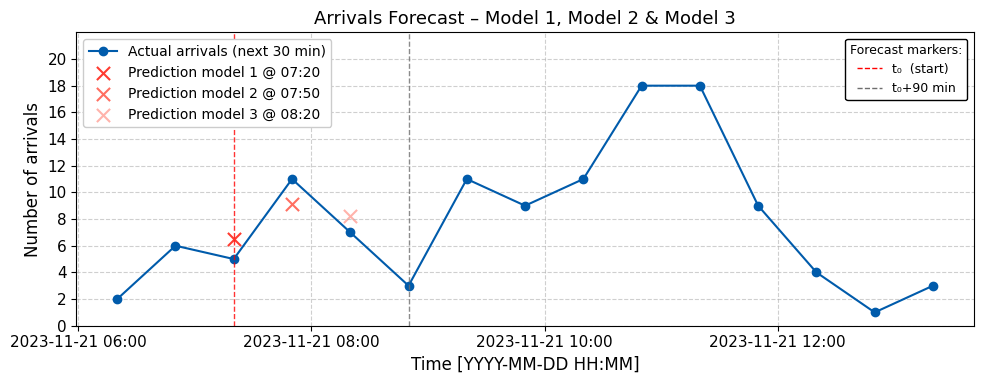

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# --- Color definitions (ZHAW style) ---
COLOR_ACTUAL = "#005BAB"     # ZHAW dark blue
COLOR_PRED1  = "#FF3B30"     # strong red
COLOR_PRED2  = "#FF6F61"     # medium red
COLOR_PRED3  = "#FFB3AB"     # light red

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
})

def plot_three_model_predictions(timestamp_str,
                                 model, model_arr2, model_arr3,
                                 features_df, X, X2, X3,
                                 history_points_before=2,
                                 history_points_after=10):

    # Parse timestamp
    ts0 = pd.to_datetime(timestamp_str, utc=True)

    # Ensure datetime format
    features_df["ts"] = pd.to_datetime(features_df["ts"], utc=True)
    df_sorted = features_df.sort_values("ts")

    # Look up the reference row
    row0 = df_sorted[df_sorted["ts"] == ts0]
    if row0.empty:
        print("⚠️ No entry found for this timestamp.")
        return

    # Get next timestamps for model 2 and 3
    future_rows = df_sorted[df_sorted["ts"] >= ts0].head(3)
    if len(future_rows) < 3:
        print("⚠️ Not enough future timestamps available for all 3 models.")
        return

    ts1 = future_rows.iloc[1]["ts"]
    ts2 = future_rows.iloc[2]["ts"]

    # History
    history_before = df_sorted[df_sorted["ts"] < ts0].tail(history_points_before)
    history_after  = df_sorted[df_sorted["ts"] > ts2].head(history_points_after)

    window_df = pd.concat([
        history_before,
        df_sorted[df_sorted["ts"].isin([ts0, ts1, ts2])],
        history_after
    ]).drop_duplicates(subset="ts").sort_values("ts")

    # --- Predictions ---
    sample1 = features_df.loc[features_df["ts"] == ts0, X.columns]
    pred1 = model.predict(sample1, num_iteration=model.best_iteration_)[0]

    sample2 = features_df.loc[features_df["ts"] == ts0, X2.columns]
    pred2 = model_arr2.predict(sample2, num_iteration=model_arr2.best_iteration_)[0]

    sample3 = features_df.loc[features_df["ts"] == ts0, X3.columns]
    pred3 = model_arr3.predict(sample3, num_iteration=model_arr3.best_iteration_)[0]

    # =====================
    #       Plotting
    # =====================
    plt.figure(figsize=(10, 4))
    ax = plt.gca()

    ax.plot(window_df["ts"], window_df["n_arrivals"],
            marker="o", linestyle="-", color=COLOR_ACTUAL,
            label="Actual arrivals (next 30 min)")

    ax.scatter([ts0], [pred1], marker="x", s=90, color=COLOR_PRED1,
               label=f"Prediction model 1 @ {ts0.strftime('%H:%M')}")
    ax.scatter([ts1], [pred2], marker="x", s=90, color=COLOR_PRED2,
               label=f"Prediction model 2 @ {ts1.strftime('%H:%M')}")
    ax.scatter([ts2], [pred3], marker="x", s=90, color=COLOR_PRED3,
               label=f"Prediction model 3 @ {ts2.strftime('%H:%M')}")

    # Forecast markers
    ts_end_90 = ts0 + pd.Timedelta(minutes=90)
    ax.axvline(ts0, color="red", linestyle="--", linewidth=1, alpha=0.8)
    ax.axvline(ts_end_90, color="#6E6E6E", linestyle="--", linewidth=1, alpha=0.8)

    # Legends
    main_legend = ax.legend(loc="upper left", framealpha=1.0)

    marker_handles = [
        Line2D([0], [0], color="red", linestyle="--", linewidth=1, label="t₀  (start)"),
        Line2D([0], [0], color="#6E6E6E", linestyle="--", linewidth=1, label="t₀+90 min"),
    ]
    marker_legend = ax.legend(
        handles=marker_handles,
        title="Forecast markers:",
        loc="upper right",
        framealpha=1,
        fancybox=True,
        edgecolor="black",
        fontsize=9,
        title_fontsize=9,
    )
    ax.add_artist(main_legend)




    # =====================
    #  Axes – IDENTISCH zu Departures
    # =====================
    ax.set_title("Arrivals Forecast – Model 1, Model 2 & Model 3")
    ax.set_xlabel("Time [YYYY-MM-DD HH:MM]")
    ax.set_ylabel("Number of arrivals")

    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylim(0, 22)
    ax.set_yticks(range(0, 21, 2))
    ax.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    pdf_path = PLOTS_DIR / "arrivals_three_model_forecast.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")

    plt.show()


# Aufruf bleibt gleich
plot_three_model_predictions(
    "2023-11-21 07:20:00+00:00",
    model,
    model_arr2,
    model_arr3,
    features_df,
    X,
    X2,
    X3
)


In [178]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

def get_metrics_table(model, X_train, X_val, X_test,
                      y_train, y_val, y_test, name):

    # Predictions
    pred_train = model.predict(X_train, num_iteration=model.best_iteration_)
    pred_val   = model.predict(X_val,   num_iteration=model.best_iteration_)
    pred_test  = model.predict(X_test,  num_iteration=model.best_iteration_)

    # Metrics
    mae_train  = mean_absolute_error(y_train, pred_train)
    mae_val    = mean_absolute_error(y_val, pred_val)
    mae_test   = mean_absolute_error(y_test, pred_test)

    rmse_train = rmse_fn(y_train, pred_train)
    rmse_val   = rmse_fn(y_val, pred_val)
    rmse_test  = rmse_fn(y_test, pred_test)

    r2_train   = r2_score(y_train, pred_train)
    r2_val     = r2_score(y_val, pred_val)
    r2_test    = r2_score(y_test, pred_test)

    # Build table as DataFrame
    df = pd.DataFrame({
        "Dataset": ["Train", "Validation", "Test"],
        "MAE":  [mae_train, mae_val, mae_test],
        "RMSE": [rmse_train, rmse_val, rmse_test],
        "R²":   [r2_train,  r2_val,  r2_test]
    })

    print(f"\n{name}")
    display(df.round(3))

    return df

df_arr1 = get_metrics_table(
    model,
    X_train, X_val, X_test,
    y_train, y_val, y_test,
    "📌 Arrivals Model 1"
)

df_arr2 = get_metrics_table(
    model_arr2,
    X2_train, X2_val, X2_test,
    y_arr2_train, y_arr2_val, y_arr2_test,
    "📌 Arrivals Model 2"
)

df_arr3 = get_metrics_table(
    model_arr3,
    X3_train, X3_val, X3_test,
    y_arr3_train, y_arr3_val, y_arr3_test,
    "📌 Arrivals Model 3"
)


📌 Arrivals Model 1


,Dataset,MAE,RMSE,R²
0,Train,1.707,2.204,0.795
1,Validation,1.907,2.455,0.740
2,Test,1.901,2.451,0.739



📌 Arrivals Model 2


,Dataset,MAE,RMSE,R²
0,Train,1.586,2.061,0.837
1,Validation,1.910,2.456,0.759
2,Test,1.900,2.464,0.759



📌 Arrivals Model 3


,Dataset,MAE,RMSE,R²
0,Train,1.532,2.017,0.852
1,Validation,1.860,2.434,0.781
2,Test,1.863,2.461,0.779


In [179]:
from IPython.display import display_html

def display_side_by_side(*args, titles=()):
    html = ""
    for i, df in enumerate(args):
        title = titles[i] if i < len(titles) else ""
        html += f"<div style='display:inline-block; margin-right:30px; vertical-align:top;'>"
        html += f"<h3>{title}</h3>"
        html += df.to_html()
        html += "</div>"
    display_html(html, raw=True)

display_side_by_side(
    df_arr1, df_arr2, df_arr3,
    titles=["Arrivals Model 1", "Arrivals Model 2", "Arrivals Model 3"]
)

,Dataset,MAE,RMSE,R²
0,Train,1.707450,2.203832,0.795192
1,Validation,1.907256,2.454596,0.739603
2,Test,1.900995,2.450768,0.738521
,Dataset,MAE,RMSE,R²
0,Train,1.585901,2.060595,0.836673
1,Validation,1.909760,2.456334,0.758767
2,Test,1.899705,2.463670,0.759099
,Dataset,MAE,RMSE,R²
0,Train,1.532155,2.016577,0.852140
1,Validation,1.860254,2.433589,0.780742


In [180]:
from IPython.display import HTML, display
import pandas as pd

def latex_metrics_single_table(df1, df2, df3,
                               name_table="Arrivals Test Metrics",
                               label_table="tab:arrivals_test_metrics",
                               model_names=("Arrivals Model 1",
                                            "Arrivals Model 2",
                                            "Arrivals Model 3")):
    
    # Hilfsfunktion: nur Test-Zeile extrahieren
    def get_test_row(df, model_name):
        row = df.tail(1).copy()
        row.insert(0, "Model", model_name)  # Modelnamen hinzufügen
        return row

    # Drei Testzeilen holen
    r1 = get_test_row(df1, model_names[0])
    r2 = get_test_row(df2, model_names[1])
    r3 = get_test_row(df3, model_names[2])

    # Zusammenführen
    df_all = pd.concat([r1, r2, r3], ignore_index=True)

    # Numerische Werte runden + formatieren
    for col in ["MAE", "RMSE", "R²"]:
        df_all[col] = df_all[col].map(lambda x: f"{x:.3f}")

    # Spalte umbennen für schönes LaTeX
    df_all = df_all.rename(columns={"R²": r"$R^2$"})

    # LaTeX erzeugen
    latex_table = df_all.to_latex(
        index=False,
        escape=False,
        column_format="lcccc"
    )

    # Block gestalten
    latex_block = fr"""
\begin{{table}}[H]
\centering
\caption{{{name_table}}}
\label{{{label_table}}}
\scriptsize
{latex_table}
\end{{table}}
"""

    # Für Notebook anzeigen
    display(HTML(f"<pre>{latex_block}</pre>"))
    return latex_block

# Aufruf
latex_metrics_single_table(df_arr1, df_arr2, df_arr3)


'\n\\begin{table}[H]\n\\centering\n\\caption{Arrivals Test Metrics}\n\\label{tab:arrivals_test_metrics}\n\\scriptsize\n\\begin{tabular}{lcccc}\n\\toprule\nModel & Dataset & MAE & RMSE & $R^2$ \\\\\n\\midrule\nArrivals Model 1 & Test & 1.901 & 2.451 & 0.739 \\\\\nArrivals Model 2 & Test & 1.900 & 2.464 & 0.759 \\\\\nArrivals Model 3 & Test & 1.863 & 2.461 & 0.779 \\\\\n\\bottomrule\n\\end{tabular}\n\n\\end{table}\n'

In [181]:
import pandas as pd
import matplotlib.pyplot as plt

# ZHAW-Blau
COLOR_ACTUAL = "#005BAB"

def plot_24h_arr_dep_separate(timestamp_str, features_df):
    """
    Creates two separate 24h plots starting at timestamp_str:
    - n_arrivals
    - n_departures
    """

    # Start and end times
    ts_start = pd.to_datetime(timestamp_str, utc=True)
    ts_end   = ts_start + pd.Timedelta(hours=24)

    # Convert timestamp column
    df = features_df.copy()
    df["ts"] = pd.to_datetime(df["ts"], utc=True)

    # Select 24h window
    mask = (df["ts"] >= ts_start) & (df["ts"] < ts_end)
    window = df.loc[mask].sort_values("ts")

    if window.empty:
        print("⚠️ No data found in the selected 24h window.")
        return

    # --- Plot 1: Arrivals ---
    plt.figure(figsize=(10, 4))
    plt.plot(window["ts"], window["n_arrivals"],
             marker="o", linestyle="-", color=COLOR_ACTUAL)
    plt.title(f"Arrivals over 24h starting {ts_start}")
    plt.xlabel("Time")
    plt.ylabel("Arrivals")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Departures ---
    plt.figure(figsize=(10, 4))
    plt.plot(window["ts"], window["n_departures"],
             marker="o", linestyle="-", color=COLOR_ACTUAL)
    plt.title(f"Departures over 24h starting {ts_start}")
    plt.xlabel("Time")
    plt.ylabel("Departures")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    


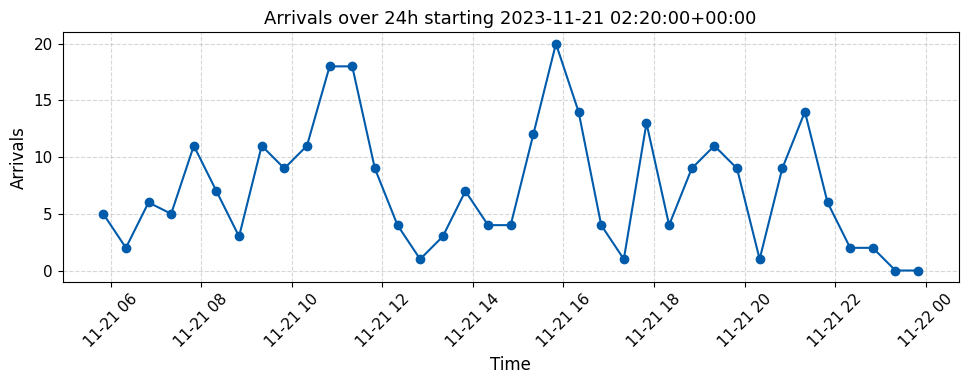

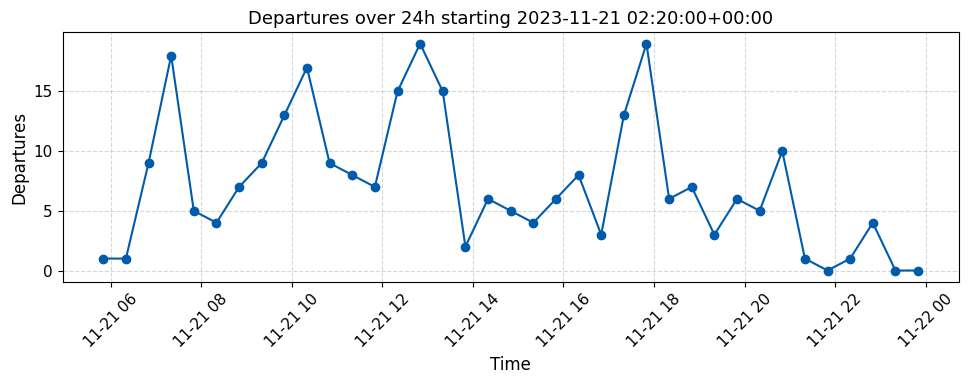

In [182]:
plot_24h_arr_dep_separate(
    "2023-11-21 02:20:00+00:00",
    features_df
)


In [183]:
import matplotlib.pyplot as plt

# ZHAW blue
COLOR_ACTUAL = "#005BAB"

def plot_residuals(model, X_test, y_test, title):
    # Predictions
    y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

    # Residuals
    residuals = y_test.values.flatten() - y_pred

    # Plot
    plt.figure(figsize=(7, 4))
    plt.scatter(y_pred, residuals, alpha=0.5, s=5, color=COLOR_ACTUAL)
    plt.axhline(0, linestyle="--", color="black")

    plt.xlabel("Predicted values")
    plt.ylabel("Residual (y_true - y_pred)")
    plt.title(title)

    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


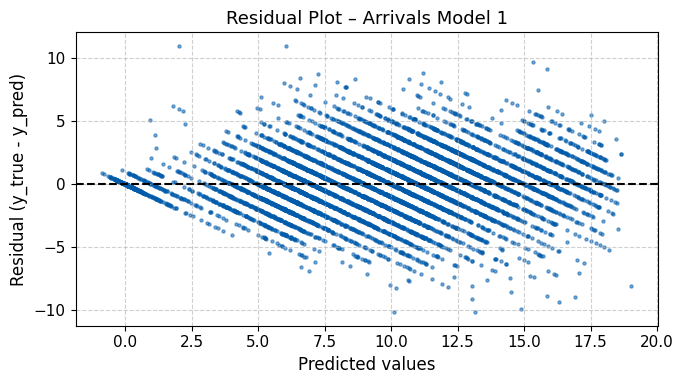

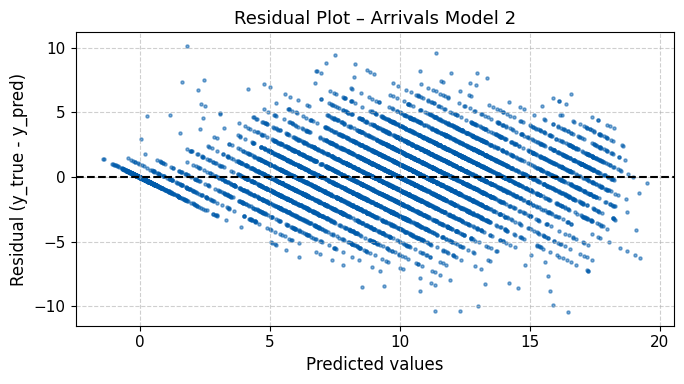

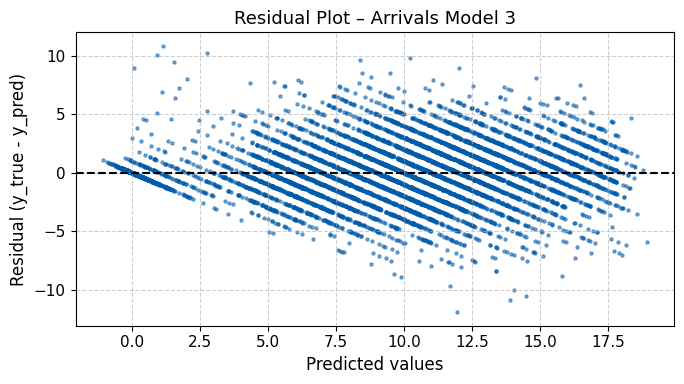

In [184]:
plot_residuals(model, X_test, y_test, "Residual Plot – Arrivals Model 1")
plot_residuals(model_arr2, X2_test, y_arr2_test, "Residual Plot – Arrivals Model 2")
plot_residuals(model_arr3, X3_test, y_arr3_test, "Residual Plot – Arrivals Model 3")


In [185]:
import numpy as np
import matplotlib.pyplot as plt

# ZHAW blue
COLOR_ACTUAL = "#005BAB"

def plot_residual_cdf(model, X_test, y_test, title="CDF of residuals"):
    # Predictions
    y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

    # Residuals
    residuals = y_test.values.flatten() - y_pred

    # Sort for CDF
    residuals_sorted = np.sort(residuals)
    n = len(residuals_sorted)

    # Empirical CDF
    cdf = np.arange(1, n + 1) / n

    # Plot
    plt.figure(figsize=(7, 4))
    plt.plot(residuals_sorted, cdf,
             linestyle="-", linewidth=2,
             color=COLOR_ACTUAL)

    plt.axvline(0, linestyle="--", linewidth=1, color="black")

    plt.xlabel("Residual (y_true - y_pred)")
    plt.ylabel("Cumulative probability")
    plt.title(title)

    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


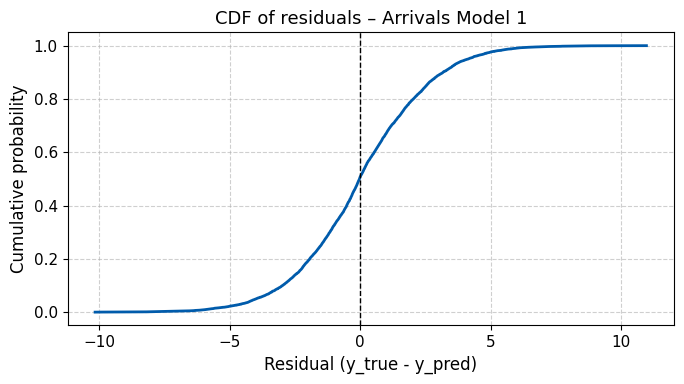

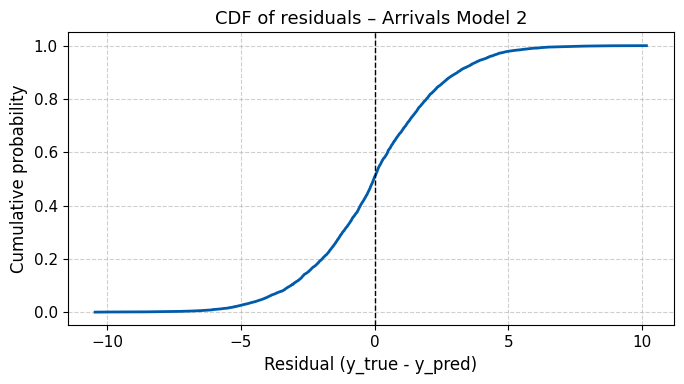

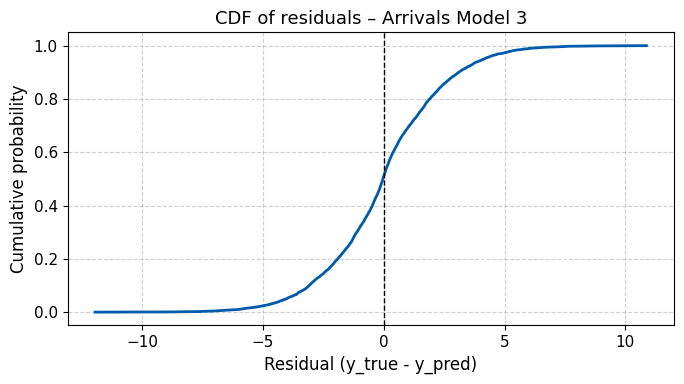

In [186]:
# --- Model 1 ---
plot_residual_cdf(
    model,
    X_test, 
    y_test,
    title="CDF of residuals – Arrivals Model 1"
)

# --- Model 2 ---
plot_residual_cdf(
    model_arr2,
    X2_test, 
    y_arr2_test,
    title="CDF of residuals – Arrivals Model 2"
)

# --- Model 3 ---
plot_residual_cdf(
    model_arr3,
    X3_test, 
    y_arr3_test,
    title="CDF of residuals – Arrivals Model 3"
)


Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\arrivals_residuals_grid_fixed_axes.pdf


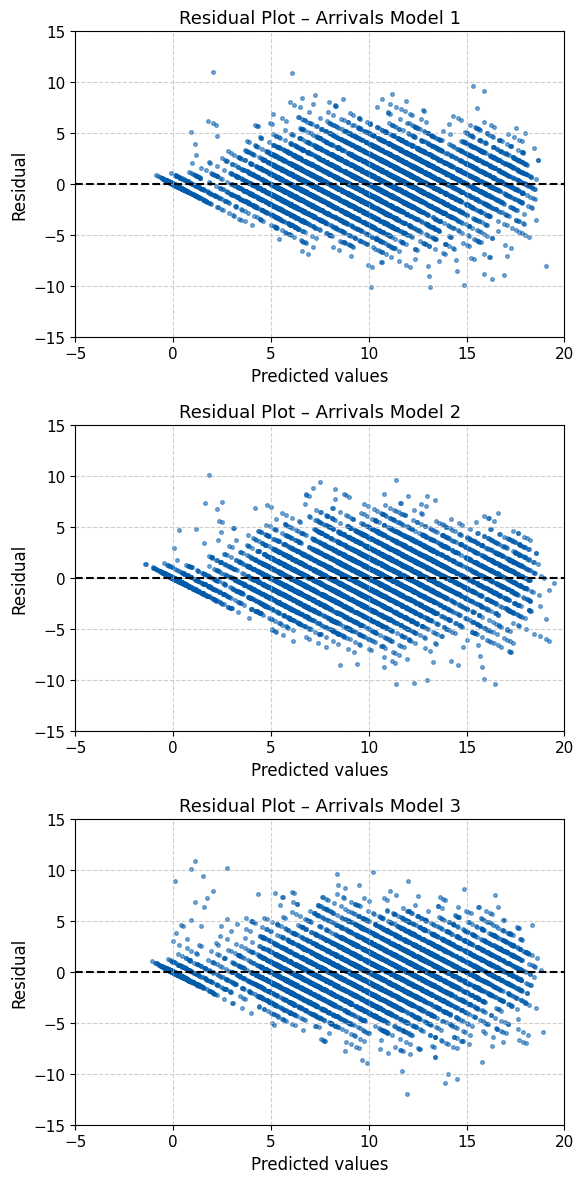

Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\arrivals_CDF.pdf


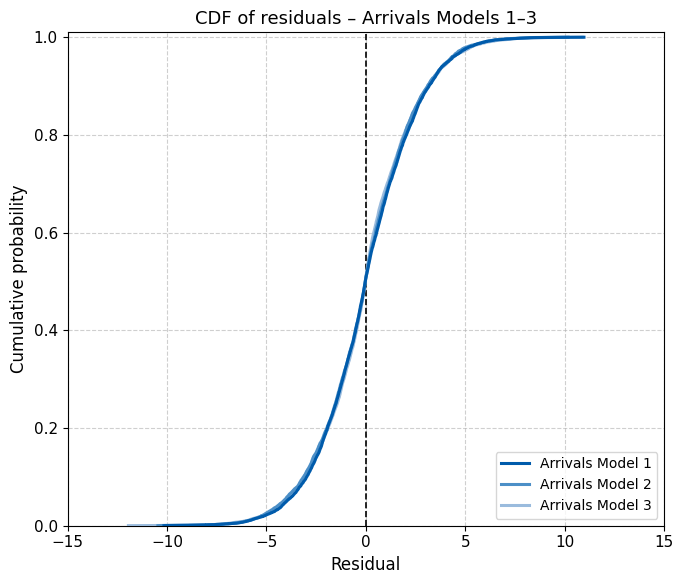

In [187]:
import matplotlib.pyplot as plt
import numpy as np

COLOR_1 = "#005BAB"   # ZHAW blau
COLOR_2 = "#4C8FC7"   # etwas heller
COLOR_3 = "#9ABBDD"   # noch heller


def plot_arrivals_residuals_grid(models, X_tests, y_tests):
    """
    3x1-Grid mit Residualplots für die drei Arrivals-Modelle.
    Achsen fix gesetzt:
        x: -5 bis 20 (Ticks alle 5)
        y: -15 bis 15 (Ticks alle 5)
    Speichert: arrivals_residuals_grid_fixed_axes.pdf
    """

    # Schriftgrößen für Report
    plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
    })

    fig, axes = plt.subplots(3, 1, figsize=(6, 12))

    residual_titles = [
        "Residual Plot – Arrivals Model 1",
        "Residual Plot – Arrivals Model 2",
        "Residual Plot – Arrivals Model 3"
    ]

    preds = []
    resids = []

    # ---- Residuals berechnen ----
    for model, X, y in zip(models, X_tests, y_tests):
        y_pred = model.predict(X, num_iteration=model.best_iteration_)
        residuals = y.values.flatten() - y_pred
        preds.append(y_pred)
        resids.append(residuals)

    # ---- FESTE ACHSEN (deine Vorgaben) ----
    X_MIN, X_MAX = -5, 20
    Y_MIN, Y_MAX = -15, 15

    for i, ax in enumerate(axes):

        ax.scatter(preds[i], resids[i], alpha=0.5, s=7, color=COLOR_1)
        ax.axhline(0, linestyle="--", color="black")

        ax.set_title(residual_titles[i])
        ax.set_xlabel("Predicted values")
        ax.set_ylabel("Residual")

        # Feste Achsen
        ax.set_xlim(X_MIN, X_MAX)
        ax.set_ylim(Y_MIN, Y_MAX)

        # Tickmarken alle 5 Schritte
        ax.set_xticks(np.arange(X_MIN, X_MAX + 1, 5))
        ax.set_yticks(np.arange(Y_MIN, Y_MAX + 1, 5))

        ax.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()

    pdf_path = PLOTS_DIR / "arrivals_residuals_grid_fixed_axes.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")

    plt.show()



def plot_arrivals_cdf(models, X_tests, y_tests):
    """
    Ein Plot mit den drei CDFs der Residuals (Arrivals Model 1–3).
    Schriftgrößen angepasst.
    Speichert: arrivals_CDF.pdf
    """

    # Schriftgrößen konsistent halten
    plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
    })

    fig, ax = plt.subplots(figsize=(7, 6))

    colors = [COLOR_1, COLOR_2, COLOR_3]
    labels = ["Arrivals Model 1", "Arrivals Model 2", "Arrivals Model 3"]

    lines = [None, None, None]
    residuals_per_model = []

    # Residuals sammeln
    for model, X, y in zip(models, X_tests, y_tests):
        y_pred = model.predict(X, num_iteration=model.best_iteration_)
        residuals = y.values.flatten() - y_pred
        residuals_per_model.append(residuals)

    # Fester Bereich wie bei Departures
    x_min, x_max = -15, 15

    # Rückwärts plotten für optische Überlappung (3 → 1)
    for idx in [2, 1, 0]:
        residuals = residuals_per_model[idx]
        res_sorted = np.sort(residuals)
        n = len(res_sorted)
        cdf = np.arange(1, n + 1) / n

        line, = ax.plot(
            res_sorted, cdf,
            color=colors[idx],
            linewidth=2.2,
            zorder=10 if idx == 0 else 5
        )
        lines[idx] = line

    ax.axvline(0, linestyle="--", color="black", linewidth=1.2)

    ax.set_title("CDF of residuals – Arrivals Models 1–3")
    ax.set_xlabel("Residual")
    ax.set_ylabel("Cumulative probability")
    ax.grid(True, linestyle="--", alpha=0.6)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, 1.01)

    ax.legend(
        [lines[0], lines[1], lines[2]],
        [labels[0], labels[1], labels[2]],
        loc="lower right"
    )

    plt.tight_layout()

    pdf_path = PLOTS_DIR / "arrivals_CDF.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")

    plt.show()



# --- Aufruf ---
plot_arrivals_residuals_grid(
    models=[model, model_arr2, model_arr3],
    X_tests=[X_test, X2_test, X3_test],
    y_tests=[y_test, y_arr2_test, y_arr3_test],
)

plot_arrivals_cdf(
    models=[model, model_arr2, model_arr3],
    X_tests=[X_test, X2_test, X3_test],
    y_tests=[y_test, y_arr2_test, y_arr3_test],
)


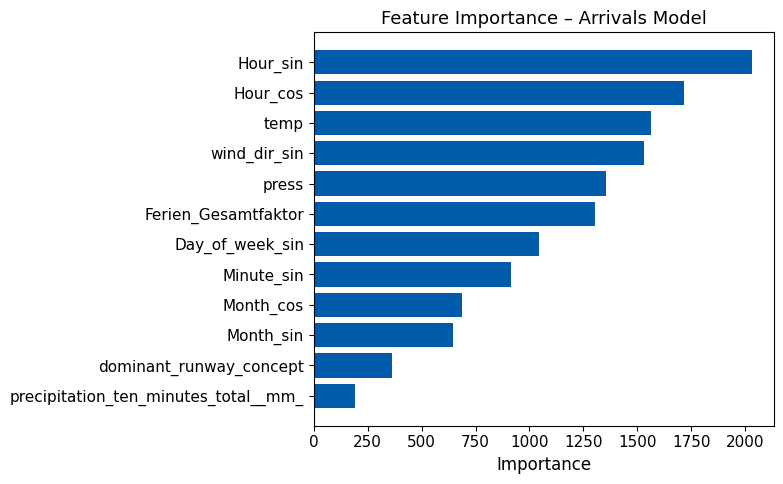

In [188]:
import matplotlib.pyplot as plt
import pandas as pd

COLOR_ACTUAL = "#005BAB"    # ZHAW blue

# Combine names + importances and sort descending
imp_df = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.barh(imp_df["feature"], imp_df["importance"], color=COLOR_ACTUAL)
plt.gca().invert_yaxis()  # highest importance on top
plt.title("Feature Importance – Arrivals Model")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\arrivals_feature_importance_grid_3x1.pdf


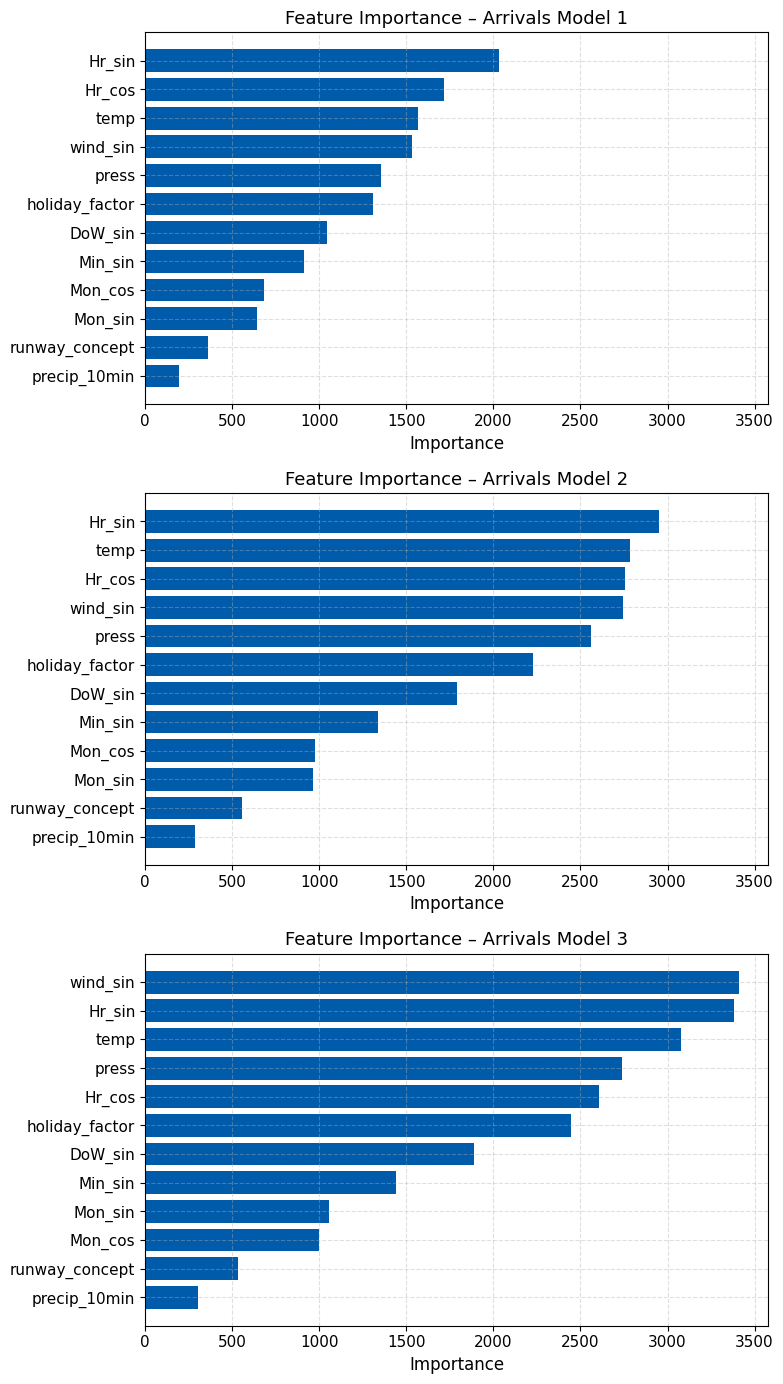

In [189]:
import matplotlib.pyplot as plt
import pandas as pd

COLOR_ACTUAL = "#005BAB"   # ZHAW blue

# --- Mapping für kurze Variablennamen ---
SHORT_NAMES = {
    "gust_peak__three_seconds__maximum_in_m_per_s__m_per_s_": "gust_peak_3s",
    "gust_peak__one_second__maximum_in_m_per_s__m_per_s_": "gust_peak_1s",
    "precipitation_ten_minutes_total__mm_": "precip_10min",
    "dominant_runway_concept": "runway_concept",
    "Ferien_Gesamtfaktor": "holiday_factor",
    "vis_cat": "vis_cat",
    "wind_dir_sin": "wind_sin",
    "wind_dir_cos": "wind_cos",
    "Hour_sin": "Hr_sin",
    "Hour_cos": "Hr_cos",
    "Minute_sin": "Min_sin",
    "Month_sin": "Mon_sin",
    "Month_cos": "Mon_cos",
    "Day_of_week_sin": "DoW_sin",
    "temp": "temp"
}

def shorten(name):
    """Return shortened feature name if available."""
    return SHORT_NAMES.get(name, name)


def plot_feature_importances_3x1(models, X_lists, labels):
    """
    Plots 3×1 Feature-Importance Charts für die 3 ARRIVALS Modelle.
    → feste Schriftgrößen
    → Einheits-Skalierung der x-Achse
    → kurze Feature-Namen
    """

    # ---------------- Schriftgrößen für Report ----------------
    plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
    })

    # ---------------- Globale X-Achsen-Grenzen ----------------
    all_importances = []
    for model in models:
        all_importances.extend(model.feature_importances_)

    global_min = 0
    global_max = max(all_importances) * 1.05

    # ---------------- 3×1 Plot ----------------
    fig, axes = plt.subplots(3, 1, figsize=(8, 14))

    for ax, (model, X, label) in zip(axes, zip(models, X_lists, labels)):

        imp_df = pd.DataFrame({
            "feature": [shorten(f) for f in X.columns],
            "importance": model.feature_importances_
        }).sort_values("importance", ascending=False)

        ax.barh(imp_df["feature"], imp_df["importance"], color=COLOR_ACTUAL)
        ax.invert_yaxis()

        ax.set_xlim(global_min, global_max)

        ax.set_title(f"Feature Importance – {label}")
        ax.set_xlabel("Importance")

        ax.grid(True, linestyle="--", alpha=0.4)

    plt.tight_layout()

    pdf_path = PLOTS_DIR / "arrivals_feature_importance_grid_3x1.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")

    plt.show()


# --- Aufruf ---
plot_feature_importances_3x1(
    models=[model, model_arr2, model_arr3],
    X_lists=[X, X2, X3],
    labels=[
        "Arrivals Model 1",
        "Arrivals Model 2",
        "Arrivals Model 3"
    ]
)


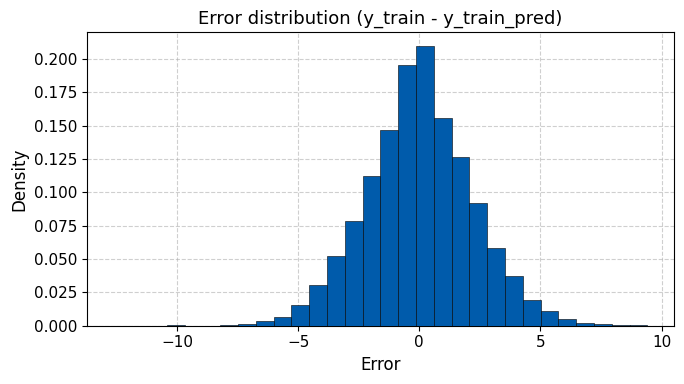

In [190]:
import matplotlib.pyplot as plt
import numpy as np

COLOR_ACTUAL = "#005BAB"   # ZHAW blue

# Errors (Training)
errors_train = y_train.values.flatten() - y_train_pred

plt.figure(figsize=(7,4))

# Histogram (über dem Grid rendern)
plt.hist(
    errors_train, bins=30, density=True,
    alpha=1.0, color=COLOR_ACTUAL,
    edgecolor="black", linewidth=0.4,
    zorder=3
)

# Grid unter dem Histogramm
plt.grid(True, linestyle="--", alpha=0.6, zorder=0)

plt.title("Error distribution (y_train - y_train_pred)")
plt.xlabel("Error")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


## Fehlerverteilung Validierungsdaten

Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\arrivals_val_error_distribution_grid.pdf


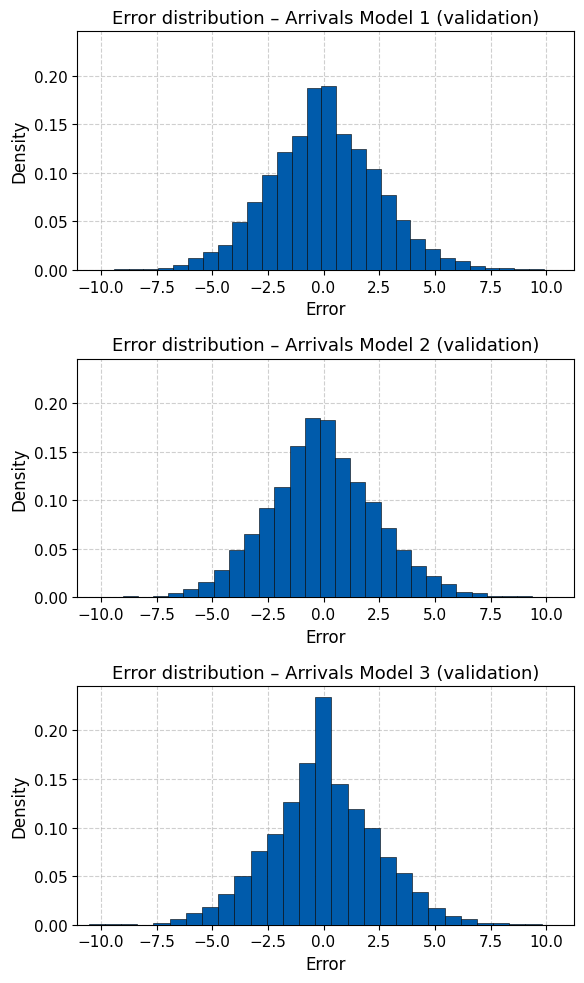

In [191]:
import matplotlib.pyplot as plt
import numpy as np

COLOR_ACTUAL = "#005BAB"   # ZHAW blue

def plot_val_error_distributions_models_3x1(y_vals, y_val_preds, labels):
    """
    Plots error histograms for validation data of three models in a 3x1 layout.
    Ensures identical x/y axis scaling across all subplots and uses larger font
    sizes suitable for printing in the report.
    """

    # -------------------------------
    # 1) Globale Fehler aller Modelle
    # -------------------------------
    all_errors = []
    max_densities = []

    for y_val, y_pred in zip(y_vals, y_val_preds):
        # y_val: pandas Series/DataFrame, y_pred: 1D-Array
        errors = y_val.values.flatten() - y_pred
        all_errors.append(errors)

        counts, bins = np.histogram(errors, bins=30, density=True)
        max_densities.append(counts.max())

    # Globale Achsenlimits
    global_min = min(e.min() for e in all_errors)
    global_max = max(e.max() for e in all_errors)
    global_ymax = max(max_densities)

    # -------------------------------
    # 2) Plot-Einstellungen (Fonts)
    # -------------------------------
    plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
    })

    # -------------------------------
    # 3) Plot: 3x1 Layout
    # -------------------------------
    fig, axes = plt.subplots(3, 1, figsize=(6, 10))  # hochformatig

    for i, (errors, label) in enumerate(zip(all_errors, labels)):
        ax = axes[i]

        ax.hist(
            errors,
            bins=30,
            density=True,
            alpha=1.0,
            color=COLOR_ACTUAL,
            edgecolor="black",
            linewidth=0.4,
            zorder=3,
        )

        # Einheitliche Achsen
        ax.set_xlim(global_min, global_max)
        ax.set_ylim(0, global_ymax * 1.05)

        ax.grid(True, linestyle="--", alpha=0.6, zorder=0)
        ax.set_title(f"Error distribution – {label} (validation)")
        ax.set_xlabel("Error")
        ax.set_ylabel("Density")

        ax.tick_params(axis="both", which="both", labelsize=11)

    plt.tight_layout()

    # Dateiname (für Arrivals – bei Bedarf anpassen)
    pdf_path = PLOTS_DIR / "arrivals_val_error_distribution_grid.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")

    plt.show()


# Beispiel-Aufruf:
plot_val_error_distributions_models_3x1(
    y_vals=[y_val, y_arr2_val, y_arr3_val],
    y_val_preds=[y_val_pred, y_arr2_val_pred, y_arr3_val_pred],
    labels=[
        "Arrivals Model 1",
        "Arrivals Model 2",
        "Arrivals Model 3",
    ],
)


## Fehlerverteilung Testdaten

Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\arrivals_test_error_distribution_density_fixed_axes.pdf


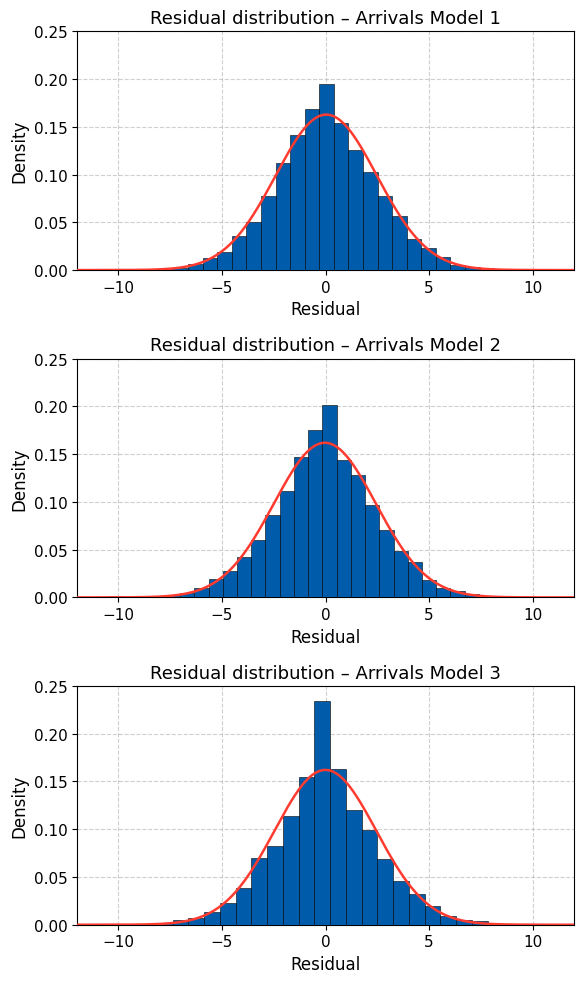


LaTeX table rows (copy into Overleaf):

\begin{tabular}{lcc}
Model & Mean ($\mu$) & Std ($\sigma$) \\ \hline
Arrivals Model 1 & 0.0353 & 2.4505 \\
Arrivals Model 2 & -0.0305 & 2.4635 \\
Arrivals Model 3 & -0.0057 & 2.4609 \\
\end{tabular}



In [192]:
import matplotlib.pyplot as plt
import numpy as np

COLOR_ACTUAL = "#005BAB"   # ZHAW blue (Histogram)
COLOR_PDF    = "#FF3B30"   # Rot für PDF-Kurve


# --- TEST-PREDICTIONS BERECHNEN (ARRIVALS 1–3) ---
y_arr1_test_pred = model.predict(X_test, num_iteration=model.best_iteration_)
y_arr2_test_pred = model_arr2.predict(X2_test, num_iteration=model_arr2.best_iteration_)
y_arr3_test_pred = model_arr3.predict(X3_test, num_iteration=model_arr3.best_iteration_)


def plot_test_error_distributions_models_3x1_arrivals(y_tests, y_test_preds, labels):
    """
    Plot der Error-Verteilungen (Arrivals 1–3, Test Dataset)
    mit festen Achsen:
        x-Achse: -12 bis +12
        y-Achse: 0 bis 0.25
    + Ausgabe von µ und σ für Overleaf.
    """

    all_errors = []
    latex_rows = []

    # Errors sammeln
    for y_test, y_pred, label in zip(y_tests, y_test_preds, labels):
        errors = y_test.values.flatten() - y_pred
        all_errors.append((errors, label))

    # PDF-x-Achse fix wie bei Departures
    x_grid = np.linspace(-12, 12, 400)

    # Schriftgrößen
    plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
    })

    fig, axes = plt.subplots(3, 1, figsize=(6, 10))

    for ax, (errors, label) in zip(axes, all_errors):

        # Histogramm (Dichte)
        ax.hist(
            errors,
            bins=30,
            density=True,
            alpha=1.0,
            color=COLOR_ACTUAL,
            edgecolor="black",
            linewidth=0.4,
            zorder=3,
        )

        # PDF (Normalverteilung)
        mu = errors.mean()
        sigma = errors.std(ddof=0)

        if sigma > 0:
            pdf_vals = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(
                -0.5 * ((x_grid - mu) / sigma)**2
            )
            ax.plot(
                x_grid,
                pdf_vals,
                color=COLOR_PDF,
                linewidth=1.8,
                zorder=4,
            )

        # ----------- Feste Achsen wie angefordert -----------
        ax.set_xlim(-12, 12)                 # feste Grenzen
        ax.set_xticks([-10, -5, 0, 5, 10])   # NUR diese Ticks

        ax.set_ylim(0, 0.25)
        ax.set_yticks(np.arange(0, 0.26, 0.05))

        ax.grid(True, linestyle="--", alpha=0.6)
        ax.set_title(f"Residual distribution – {label}")
        ax.set_xlabel("Residual")
        ax.set_ylabel("Density")

        # Tabelle
        latex_rows.append(f"{label} & {mu:.4f} & {sigma:.4f} \\\\")

    plt.tight_layout()

    pdf_path = PLOTS_DIR / "arrivals_test_error_distribution_density_fixed_axes.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")

    plt.show()

    # --- LaTeX Tabelle ---
    print("\nLaTeX table rows (copy into Overleaf):\n")
    print("\\begin{tabular}{lcc}")
    print("Model & Mean ($\\mu$) & Std ($\\sigma$) \\\\ \\hline")
    for row in latex_rows:
        print(row)
    print("\\end{tabular}\n")


# --- Aufruf ---
plot_test_error_distributions_models_3x1_arrivals(
    y_tests=[y_test, y_arr2_test, y_arr3_test],
    y_test_preds=[y_arr1_test_pred, y_arr2_test_pred, y_arr3_test_pred],
    labels=[
        "Arrivals Model 1",
        "Arrivals Model 2",
        "Arrivals Model 3"
    ]
)
